#  Random Forest from scratch (we really hope!)

## Data Creation 

In [2]:
from numpy.random import default_rng
import numpy as np

In [3]:
rand = default_rng(110)
data = rand.integers(0,800,(10,6))
data

array([[479, 744, 508, 409, 184, 570],
       [560, 401,  35, 191, 190, 701],
       [708,  55, 414, 562, 737,  78],
       [784, 356, 297, 419, 681, 211],
       [785,  51, 680, 509, 364, 392],
       [754, 512, 367, 350, 202, 570],
       [222, 561,  43, 307, 691, 665],
       [449, 674, 758, 374, 670, 655],
       [ 46, 304, 143, 499, 293, 453],
       [ 48, 624, 396, 574, 138, 762]], dtype=int64)

## Create Bootstrap Samples (Code)

In [14]:
bs = rand.choice(data,data.shape[0],replace=True)
bs

array([[ 48, 624, 396, 574, 138, 762],
       [ 46, 304, 143, 499, 293, 453],
       [560, 401,  35, 191, 190, 701],
       [ 46, 304, 143, 499, 293, 453],
       [ 48, 624, 396, 574, 138, 762],
       [449, 674, 758, 374, 670, 655],
       [708,  55, 414, 562, 737,  78],
       [ 48, 624, 396, 574, 138, 762],
       [560, 401,  35, 191, 190, 701],
       [222, 561,  43, 307, 691, 665]], dtype=int64)

In [15]:
np.unique(bs, axis=0).shape[0]

6

## Average Number of Out-of-Bag Samples

In [24]:
oob_samples =[]
for i in range(1,100):
    bs = rand.choice(data,data.shape[0],replace=True)
    n_unique_samples = np.unique(bs, axis=0).shape[0]
    oob = (data.shape[0] - n_unique_samples) / data.shape[0]
    oob_samples.append(oob)
np.mean(oob_samples)    

0.34040404040404026

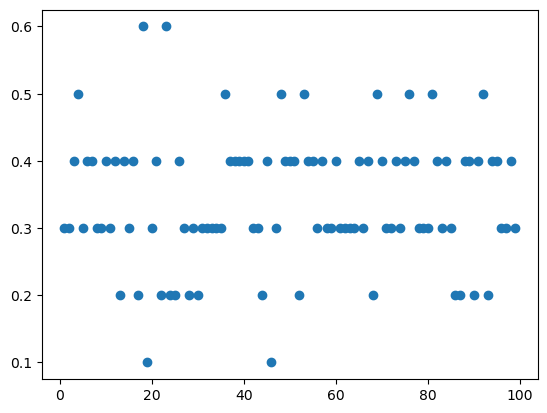

In [25]:
import matplotlib.pyplot as plt
plt.scatter(range(1,100),oob_samples)

## Create a Function to Produce a Bootstrap Sample and Corresponding OOB Samples

In [26]:
data

array([[479, 744, 508, 409, 184, 570],
       [560, 401,  35, 191, 190, 701],
       [708,  55, 414, 562, 737,  78],
       [784, 356, 297, 419, 681, 211],
       [785,  51, 680, 509, 364, 392],
       [754, 512, 367, 350, 202, 570],
       [222, 561,  43, 307, 691, 665],
       [449, 674, 758, 374, 670, 655],
       [ 46, 304, 143, 499, 293, 453],
       [ 48, 624, 396, 574, 138, 762]], dtype=int64)

In [40]:
def bs_sampling(data):
    bs = rand.choice(data,data.shape[0],replace=True)
    unique_bs = np.unique(bs, axis=0)
    oob=[]
    for row in data:
        if sum(np.isin(row,unique_bs))==0:
            oob.append(row) 
    return bs,np.array(oob)

In [44]:
bs,oob = bs_sampling(data)

In [45]:
bs

array([[708,  55, 414, 562, 737,  78],
       [449, 674, 758, 374, 670, 655],
       [784, 356, 297, 419, 681, 211],
       [479, 744, 508, 409, 184, 570],
       [708,  55, 414, 562, 737,  78],
       [784, 356, 297, 419, 681, 211],
       [560, 401,  35, 191, 190, 701],
       [ 46, 304, 143, 499, 293, 453],
       [449, 674, 758, 374, 670, 655],
       [479, 744, 508, 409, 184, 570]], dtype=int64)

In [46]:
oob

array([[785,  51, 680, 509, 364, 392],
       [222, 561,  43, 307, 691, 665],
       [ 48, 624, 396, 574, 138, 762]], dtype=int64)

In [31]:
a=[10,20,35,50,60]
b=[20,60]
c=[100,200]
sum(np.isin(a,c))


0

## Create a Function to Produce a Decision Tree from a Data Sample

In [51]:
data

array([[479, 744, 508, 409, 184, 570],
       [560, 401,  35, 191, 190, 701],
       [708,  55, 414, 562, 737,  78],
       [784, 356, 297, 419, 681, 211],
       [785,  51, 680, 509, 364, 392],
       [754, 512, 367, 350, 202, 570],
       [222, 561,  43, 307, 691, 665],
       [449, 674, 758, 374, 670, 655],
       [ 46, 304, 143, 499, 293, 453],
       [ 48, 624, 396, 574, 138, 762]], dtype=int64)

In [62]:
from sklearn.tree import DecisionTreeRegressor

def create_tree(data):
    X = data[:,0:-1]
    y = data[:,-1]
    dt = DecisionTreeRegressor()
    dt.fit(X,y)
    return dt
    

In [63]:
create_tree(data)

DecisionTreeRegressor()

## Make Predictions using the Decision Tree 

In [64]:
create_tree(data).predict([[479, 744, 508, 409, 184]])

array([570.])

## Select a Random Subset of Features/Columns from a Data Sample

In [65]:
data

array([[479, 744, 508, 409, 184, 570],
       [560, 401,  35, 191, 190, 701],
       [708,  55, 414, 562, 737,  78],
       [784, 356, 297, 419, 681, 211],
       [785,  51, 680, 509, 364, 392],
       [754, 512, 367, 350, 202, 570],
       [222, 561,  43, 307, 691, 665],
       [449, 674, 758, 374, 670, 655],
       [ 46, 304, 143, 499, 293, 453],
       [ 48, 624, 396, 574, 138, 762]], dtype=int64)

In [67]:
total_features = data.shape[1]-1
total_features

5

In [71]:
rand_n_of_feaures = int(np.sqrt(total_features))
rand_n_of_feaures

2

In [83]:
selected_features = rand.choice(total_features,rand_n_of_feaures,replace=False)
selected_features

array([1, 2], dtype=int64)

In [85]:
selected_features_with_y = np.append(selected_features,-1)
selected_features_with_y

array([ 1,  2, -1], dtype=int64)

In [88]:
bs

array([[708,  55, 414, 562, 737,  78],
       [449, 674, 758, 374, 670, 655],
       [784, 356, 297, 419, 681, 211],
       [479, 744, 508, 409, 184, 570],
       [708,  55, 414, 562, 737,  78],
       [784, 356, 297, 419, 681, 211],
       [560, 401,  35, 191, 190, 701],
       [ 46, 304, 143, 499, 293, 453],
       [449, 674, 758, 374, 670, 655],
       [479, 744, 508, 409, 184, 570]], dtype=int64)

In [87]:
temp_data = bs[:,selected_features_with_y]
temp_data

array([[ 55, 414,  78],
       [674, 758, 655],
       [356, 297, 211],
       [744, 508, 570],
       [ 55, 414,  78],
       [356, 297, 211],
       [401,  35, 701],
       [304, 143, 453],
       [674, 758, 655],
       [744, 508, 570]], dtype=int64)

## Put it All Together

In [93]:
def simple_rf(data):
    bs,oob = bs_sampling(data)
    print(f"oob:",oob)
    total_features = data.shape[1]-1
    rand_n_of_feaures = int(np.sqrt(total_features))
    selected_features = rand.choice(total_features,rand_n_of_feaures,replace=False)
    selected_features_with_y = np.append(selected_features,-1)
    sample_data = bs[:,selected_features_with_y]
    dt = create_tree(sample_data)
    sample_oob = oob[:,selected_features]
    preds = dt.predict(sample_oob)
    return preds 

In [94]:
data

array([[479, 744, 508, 409, 184, 570],
       [560, 401,  35, 191, 190, 701],
       [708,  55, 414, 562, 737,  78],
       [784, 356, 297, 419, 681, 211],
       [785,  51, 680, 509, 364, 392],
       [754, 512, 367, 350, 202, 570],
       [222, 561,  43, 307, 691, 665],
       [449, 674, 758, 374, 670, 655],
       [ 46, 304, 143, 499, 293, 453],
       [ 48, 624, 396, 574, 138, 762]], dtype=int64)

In [95]:
simple_rf(data)

oob: [[479 744 508 409 184 570]
 [754 512 367 350 202 570]
 [449 674 758 374 670 655]]


array([701., 392., 665.])